In [2]:
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from collections import defaultdict
%matplotlib inline
from helper import *

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Setting the font sizes for various items in plotting the figures

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Importing the data
- The data being imported corresponds to benchmark point BP5 for type II 2HDM,

   $$M_{H^+}=548~ \text{GeV},~ M_A=258~ \text{GeV},~ \tan\beta= 44,~ \sin(\beta-\alpha)=0.99$$ 
   
- twbb_sig.json -> signal events
- twbb_bck.json -> background events
- twbb_tot.json -> signal + background + interference events

In [4]:
dta_sig = pd.read_json('twbb_sig.json',orient='records')
dta_bck = pd.read_json('twbb_bck.json',orient='records')
dta_tot = pd.read_json('twbb_tot.json',orient='records')

In [123]:
dta=defaultdict(pd.DataFrame)
dta['sig'] = pd.read_json('twbb_sig.json',orient='records')
dta['bck'] = pd.read_json('twbb_bck.json',orient='records')
dta['tot'] = pd.read_json('twbb_tot.json',orient='records')

## Data Cleaning
All those events which contain there nan values are removed from the event list. For this purpose, a function 'remove_nan_events()' is included in the helper.py module. This function takes the data files and returns cleaned data file, i.e., after all nan values have been removed and a list which give the event numbers which have been purged.

In [127]:
process=['sig','bck','tot']
deleted_events=defaultdict(list)
for e in process:
    dta[e],deleted_events[e]=remove_nan_events(dta[e])

In [129]:
deleted_events['tot']

[796, 3477]

In [5]:
dta_sig,deleted_events_sig = remove_nan_events(dta_sig)
dta_bck,deleted_events_bck = remove_nan_events(dta_bck)
dta_tot,deleted_events_tot = remove_nan_events(dta_tot)

### CUT-2: Cut on the number of jets in the event.

For our process, we expect at least 5 jets at the detector out of which 3 should be b-tagged and remaining are light jets. In the following cut, we just impose to have events where total number of jets are larger or equal to 5. Note that the a cut regarding only one lepton has already been implemented in the json data files.

In [6]:
dta_sig=dta_sig.loc[dta_sig['Jet'].map(len)>4,:]
dta_sig.reset_index(drop=True,inplace=True)

dta_bck=dta_bck.loc[dta_bck['Jet'].map(len)>4,:]
dta_bck.reset_index(drop=True,inplace=True)

dta_tot=dta_tot.loc[dta_tot['Jet'].map(len)>4,:]
dta_tot.reset_index(drop=True,inplace=True)

In [7]:
n_sig_2=len(dta_sig)
n_bck_2=len(dta_bck)
n_tot_2=len(dta_tot)

print('{:>45}{:>16}{:>14}'.format('Signal','Background','Total'))
print('Number of events after Cut-2:{:15}{:15}{:15}'.format(n_sig_2,n_bck_2,n_tot_2))

                                       Signal      Background         Total
Number of events after Cut-2:          15421           8253           8279


In [111]:
chk=defaultdict(lambda:defaultdict(pd.DataFrame))

In [8]:
def jet_vars(dta):
    
    Jet_1=pd.Series([dta['Jet'][i][0] for i in range(len(dta))]).apply(pd.Series)
    Jet_2=pd.Series([dta['Jet'][i][1] for i in range(len(dta))]).apply(pd.Series)
    Jet_3=pd.Series([dta['Jet'][i][2] for i in range(len(dta))]).apply(pd.Series)
    Jet_4=pd.Series([dta['Jet'][i][3] for i in range(len(dta))]).apply(pd.Series)
    Jet_5=pd.Series([dta['Jet'][i][4] for i in range(len(dta))]).apply(pd.Series)
    
    Jet_1.columns=['pT','Eta','Phi','BTag']
    Jet_2.columns=['pT','Eta','Phi','BTag']
    Jet_3.columns=['pT','Eta','Phi','BTag']
    Jet_4.columns=['pT','Eta','Phi','BTag']
    Jet_5.columns=['pT','Eta','Phi','BTag']

    Jet_1['E']=Jet_1['sig']['pT']*Jet_1['sig']['Eta'].map(math.cosh)
    Jet_2['E']=Jet_2['sig']['pT']*Jet_2['sig']['Eta'].map(math.cosh)
    Jet_3['E']=Jet_3['sig']['pT']*Jet_3['sig']['Eta'].map(math.cosh)
    Jet_4['E']=Jet_4['sig']['pT']*Jet_4['sig']['Eta'].map(math.cosh)
    Jet_5['E']=Jet_5['sig']['pT']*Jet_5['sig']['Eta'].map(math.cosh)
    
    return Jet_1,Jet_2,Jet_3,Jet_4,Jet_5

In [117]:
def jet_vars(dta,jet_id):
    
    Jet=pd.Series([dta['Jet'][i][jet_id] for i in range(len(dta))]).apply(pd.Series)
    Jet.columns=['pT','Eta','Phi','BTag']
    Jet['E']=Jet['pT']*Jet['Eta'].map(math.cosh)
    
    return Jet

In [120]:
Jet=defaultdict(lambda: defaultdict(pd.DataFrame))
for e in ['sig','bck','tot']:
    Jet['0'][e]=jet_vars(dta_sig,0)

In [121]:
Jet['0']['sig']

,pT,Eta,Phi,BTag,E
0,187.052414,0.322156,2.016195,1.0,196.843195
1,210.458099,-1.237336,-1.166469,1.0,393.196447
2,129.887039,1.289581,1.603479,0.0,253.711593
3,277.191559,-0.854368,0.871888,1.0,384.664283
4,202.663315,-0.780011,0.405586,1.0,267.505078
5,190.130249,1.974709,0.289743,1.0,698.094004
6,315.602692,0.397843,1.642555,0.0,340.910503
7,165.348923,-0.534121,0.066303,1.0,189.500796
8,797.604675,0.000756,2.163650,1.0,797.604903
9,126.634674,-1.560745,0.274788,1.0,314.835801


In [9]:
Jet_1_sig,Jet_2_sig,Jet_3_sig,Jet_4_sig,Jet_5_sig = jet_vars(dta_sig)
Jet_1_bck,Jet_2_bck,Jet_3_bck,Jet_4_bck,Jet_5_bck = jet_vars(dta_bck)
Jet_1_tot,Jet_2_tot,Jet_3_tot,Jet_4_tot,Jet_5_tot = jet_vars(dta_tot)

In [10]:
Jet_1={'sig':Jet_1_sig, 'bck':Jet_1_tot, 'tot':Jet_1_tot}
Jet_2={'sig':Jet_2_sig, 'bck':Jet_2_tot, 'tot':Jet_2_tot}
Jet_3={'sig':Jet_3_sig, 'bck':Jet_3_tot, 'tot':Jet_3_tot}
Jet_4={'sig':Jet_4_sig, 'bck':Jet_4_tot, 'tot':Jet_4_tot}
Jet_5={'sig':Jet_5_sig, 'bck':Jet_5_tot, 'tot':Jet_5_tot}

In [106]:
Lepton_sig=dta_sig['Lepton'].apply(pd.Series)
Lepton_bck=dta_bck['Lepton'].apply(pd.Series)
Lepton_tot=dta_tot['Lepton'].apply(pd.Series)

Lepton_sig.columns=['pT','Eta','Phi','PId']
Lepton_bck.columns=['pT','Eta','Phi','PId']
Lepton_tot.columns=['pT','Eta','Phi','PId']

Lepton_sig['E']=Lepton['sig']['pT']*Lepton['sig']['Eta'].map(math.cosh)
Lepton_bck['E']=Lepton['bck']['pT']*Lepton['bck']['Eta'].map(math.cosh)
Lepton_tot['E']=Lepton['tot']['pT']*Lepton['tot']['Eta'].map(math.cosh)

Lepton={'sig':Lepton_sig,'bck':Lepton_bck,'tot':Lepton_tot}

## Plotting the distributions
In the following, we use Dist_plot() function to plot the distributions for various objects in the events. Dist_plot() has been defined in helper.py module and it performs following tasks:
- The function takes inputs of list of four momenta corresponding to a object for a number of events for two different processes, i.e., signal and total in the following illustration
- It then plots distribution corresponding to transverse momentum $p_T$, pseudo-rapidity $\eta$ and Energy $E$ of the objects for each process

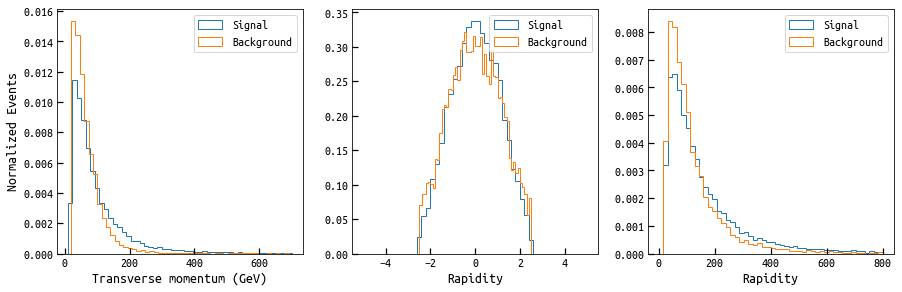

In [108]:
layout=(1,3)
fig=plt.figure(figsize=(15,4.5))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(Lepton['sig']['pT'],bins=50,histtype='step',normed=True,label='Signal',range=[10,700])
_=ax1.hist(Lepton['bck']['pT'],bins=50,histtype='step',normed=True,label='Background')
ax1.set_xlabel('Transverse momentum (GeV)')
ax1.set_ylabel('Normalized Events')
ax1.tick_params(axis='both',direction='in',length=6,width=1.25)
ax1.legend()

ax2=plt.subplot2grid(layout,(0,1))
_=ax2.hist(Lepton['sig']['Eta'],bins=50,histtype='step',normed=True,label='Signal',range=[-5,5])
_=ax2.hist(Lepton['bck']['Eta'],bins=50,histtype='step',normed=True,label='Background')
ax2.set_xlabel('Rapidity')
ax2.tick_params(axis='both',direction='in',length=6,width=1.25)
ax2.legend()

#Plotting the Lepton energy figures
ax2=plt.subplot2grid(layout,(0,2))
_=ax2.hist(Lepton['sig']['E'],bins=50,histtype='step',normed=True,label='Signal',range=[0,800])
_=ax2.hist(Lepton['bck']['E'],bins=50,histtype='step',normed=True,label='Background',range=[0,800])
ax2.set_xlabel('Rapidity')
ax2.tick_params(axis='both',direction='in',length=6,width=1.25)
ax2.legend()


TypeError: a float is required

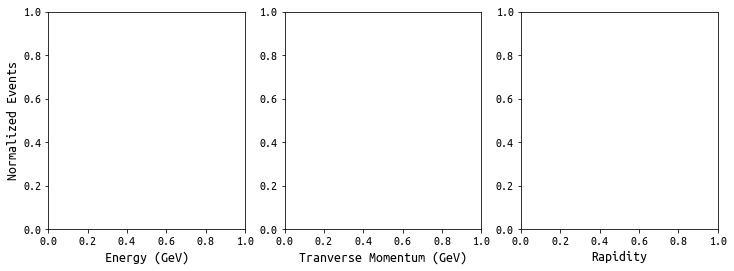

In [109]:
figsize=(12,4)
label_1='Jet_1'
range_1=[10,1000]
range_2=[10,800]

Dist_plot(Jet_1_bck,Jet_1_tot,figsize,label_1,range_1,range_2)
Dist_plot(Jet_2_bck,Jet_2_tot,(12, 4),'Jet_2',[10,1000],[10,600])
Dist_plot(Jet_3_bck,Jet_3_tot,(12, 4),'Jet_3',[10,800],[10,500])
Dist_plot(Jet_4_bck,Jet_4_tot,(12, 4),'Jet_4',[10,700],[10,400])
Dist_plot(Jet_5_bck,Jet_5_tot,(12, 4),'Jet_5',[10,600],[10,300])

In [50]:
DelR=defaultdict(pd.DataFrame)
for e in ['sig','bck','tot']:
    DelR[e]=pd.DataFrame({'DelR12':(Jet_1[e]['Eta']-Jet_2[e]['Eta']),   #1
                          'DelR13':(Jet_1[e]['Eta']-Jet_3[e]['Eta']),   #2
                          'DelR14':(Jet_1[e]['Eta']-Jet_4[e]['Eta']),   #3
                          'DelR15':(Jet_1[e]['Eta']-Jet_5[e]['Eta']),   #4
                          'DelR23':(Jet_2[e]['Eta']-Jet_3[e]['Eta']),   #5
                          'DelR24':(Jet_2[e]['Eta']-Jet_4[e]['Eta']),   #6
                          'DelR25':(Jet_2[e]['Eta']-Jet_5[e]['Eta']),   #7
                          'DelR24':(Jet_3[e]['Eta']-Jet_4[e]['Eta']),   #8
                          'DelR24':(Jet_3[e]['Eta']-Jet_5[e]['Eta']),   #9
                          'DelR24':(Jet_4[e]['Eta']-Jet_5[e]['Eta'])})  #10

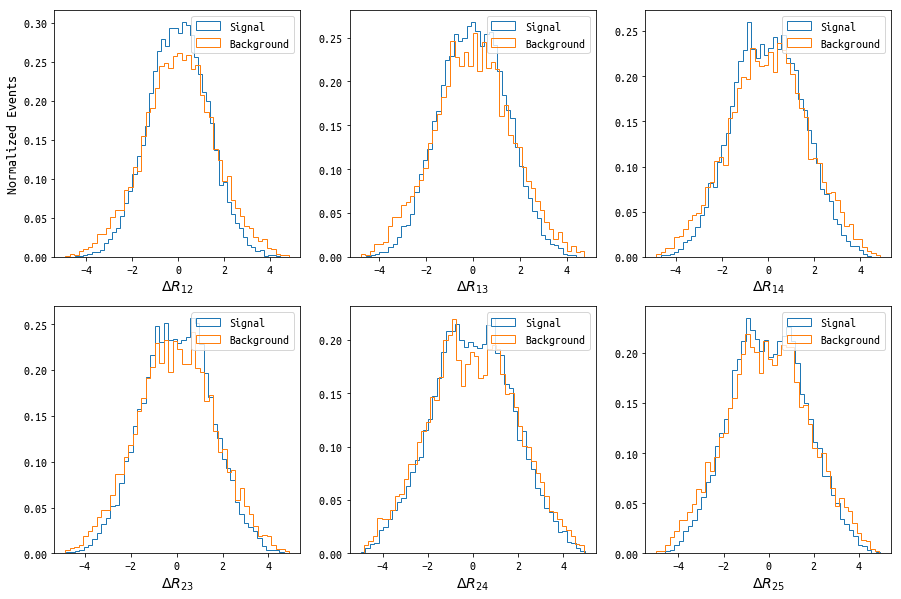

In [53]:
layout=(2,3)
fig=plt.figure(figsize=(15,10))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(DelR['sig']['DelR12'],bins=50,histtype='step',normed=True,label='Signal')
_=ax1.hist(DelR['tot']['DelR12'],bins=50,histtype='step',normed=True,label='Background')
ax1.set_xlabel(r'$\Delta R_{12}$')
ax1.set_ylabel('Normalized Events')
ax1.legend()

ax2=plt.subplot2grid(layout,(0,1))
_=ax2.hist(DelR['sig']['DelR13'],bins=50,histtype='step',normed=True,label='Signal')
_=ax2.hist(DelR['tot']['DelR13'],bins=50,histtype='step',normed=True,label='Background')
ax2.set_xlabel(r'$\Delta R_{13}$')
ax2.legend()

ax3=plt.subplot2grid(layout,(0,2))
_=ax3.hist(DelR['sig']['DelR14'],bins=50,histtype='step',normed=True,label='Signal')
_=ax3.hist(DelR['tot']['DelR14'],bins=50,histtype='step',normed=True,label='Background')
ax3.set_xlabel(r'$\Delta R_{14}$')
ax3.legend()

ax4=plt.subplot2grid(layout,(1,0))
_=ax4.hist(DelR['sig']['DelR23'],bins=50,histtype='step',normed=True,label='Signal')
_=ax4.hist(DelR['tot']['DelR23'],bins=50,histtype='step',normed=True,label='Background')
ax4.set_xlabel(r'$\Delta R_{23}$')
ax4.legend()

ax5=plt.subplot2grid(layout,(1,1))
_=ax5.hist(DelR['sig']['DelR24'],bins=50,histtype='step',normed=True,label='Signal')
_=ax5.hist(DelR['tot']['DelR24'],bins=50,histtype='step',normed=True,label='Background')
ax5.set_xlabel(r'$\Delta R_{24}$')
ax5.legend()

ax6=plt.subplot2grid(layout,(1,2))
_=ax6.hist(DelR['sig']['DelR25'],bins=50,histtype='step',normed=True,label='Signal')
_=ax6.hist(DelR['tot']['DelR25'],bins=50,histtype='step',normed=True,label='Background')
ax6.set_xlabel(r'$\Delta R_{25}$')
ax6.legend()

### We now calculate the probability of tagging b-jets for first 5 hard jets in an event for signal and background processes.

In [ ]:
def get_btag_prob(Jets):
    b_tag_prob=[]
    for e in Jets:
        n_btag=0
        n_no_tag=0
        for i in range(len(e)):
            if e['BTag'][i] == 1.0:
                n_btag = n_btag + 1
            else :
                n_no_tag = n_no_tag + 1
        b_tag_prob.append(n_btag/len(e))
    return b_tag_prob 

In [ ]:
Jets_sig=[Jet_1_sig,Jet_2_sig,Jet_3_sig,Jet_4_sig,Jet_5_sig]
Jets_bck=[Jet_1_bck,Jet_2_bck,Jet_3_bck,Jet_4_bck,Jet_5_bck]
Jets_tot=[Jet_1_tot,Jet_2_tot,Jet_3_tot,Jet_4_tot,Jet_5_tot]

In [ ]:
b_tag_prob_sig=get_btag_prob(Jets_sig)
b_tag_prob_bck=get_btag_prob(Jets_bck)
b_tag_prob_tot=get_btag_prob(Jets_tot)

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
num_of_jets=5
index=np.arange(num_of_jets)
width=0.4

ax.bar(index,b_tag_prob_sig,width, alpha=0.55,color='black')
ax.bar(index+width,b_tag_prob_bck,width,alpha=0.25,color='black')

ax.set_xticks(index+width/2.0 )
ax.set_xticklabels( (r'J$_1$', r'J$_2$', r'J$_3$', r'J$_4$', r'J$_5$'))
ax.set_ylabel('Probability of b-tagging')
ax.legend(('Signal','Background'))

## Calculating the longtudinal momentum of the missing neutrino

In [ ]:
Missing_ET_sig=dta_sig['Missing_ET'].apply(pd.Series)
Missing_ET_bck=dta_bck['Missing_ET'].apply(pd.Series)
Missing_ET_tot=dta_tot['Missing_ET'].apply(pd.Series)

Missing_ET_sig.columns=['pT','Eta','Phi']
Missing_ET_bck.columns=['pT','Eta','Phi']
Missing_ET_tot.columns=['pT','Eta','Phi']

In [ ]:
MET={'sig':Missing_ET_sig,'bck':Missing_ET_bck,'tot':Missing_ET_tot}

In [ ]:
MW=80.301

for i in range(1):
    px_nu=MET['sig']['pT'][i]*math.cos(MET['sig']['Phi'][i])
    py_nu=MET['sig']['pT'][i]*math.sin(MET['sig']['Phi'][i])

    met=MET['sig']['pT'][i]

    px_lep=Lepton['sig']['pT'][i]*math.cos(Lepton['sig']['Phi'][i])
    py_lep=Lepton['sig']['pT'][i]*math.sin(Lepton['sig']['Phi'][i])
    pz_lep=Lepton['sig']['pT'][i]*math.sinh(Lepton['sig']['Eta'][i])
    E_lep =Lepton['sig']['pT'][i]*math.cosh(Lepton['sig']['Eta'][i])

    P_lep=math.sqrt(px_lep**2 + py_lep**2 + pz_lep**2)
    P_lep_T=Lepton['sig']['pT'][i]

    AW=MW**2 + 2.0*(px_lep*px_nu + py_lep*py_nu)
    Discrim=AW**2 - 4.0*(P_lep_T*met)**2

    if Discrim>0:
        pz_nu_p=(0.5/(P_lep_T**2))*(AW*pz_lep + E_lep*math.sqrt(Discrim))
        pz_nu_m=(0.5/(P_lep_T**2))*(AW*pz_lep - E_lep*math.sqrt(Discrim))

        E_nu_p=math.sqrt(pz_nu_p**2 + met**2)
        E_nu_m=math.sqrt(pz_nu_m**2 + met**2)

        p_nu_p=[px_nu,py_nu,pz_nu_p,E_nu_p]
        p_nu_m=[px_nu,py_nu,pz_nu_m,E_nu_m]
    
        px_W = px_nu + px_lep
        py_W = py_nu + py_lep
        
        pz_W_p = pz_nu_p + pz_lep
        E_W_p  = E_nu_p + E_lep
        
        pz_W_m = pz_nu_m + pz_lep
        E_W_m  = E_nu_m + E_lep
        
        p_W_p = [px_W,py_W,pz_W_p,E_W_p]
        p_W_m = [px_W,py_W,pz_W_m,E_W_m]


In [ ]:
print(get_invariant_mass(p_nu_p,dta_sig['Lepton'][0]),get_invariant_mass(p_W_m))